# 결정 트리 실습 - Human Activity Recognition

In [73]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [74]:
train = pd.read_csv('human_activity\\train.csv')
test = pd.read_csv('human_activity\\test.csv')

In [75]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 12.7+ MB


In [76]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [13]:
train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS


In [20]:
train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [59]:
print(train['DESCR'])

KeyError: 'DESCR'

In [15]:
train.shape

(7352, 563)

In [16]:
train.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [17]:
train['Activity'].value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [18]:
train['subject'].value_counts()

25    409
21    408
26    392
30    383
28    382
27    376
23    372
17    368
16    366
19    360
1     347
29    344
3     341
15    328
6     325
14    323
22    321
11    316
7     308
5     302
8     281
Name: subject, dtype: int64

In [24]:
train.isna().values.sum()

0

In [25]:
test.isna().values.sum()

0

In [82]:
X_train = train.drop(['subject', 'Activity'], axis=1)
y_train = train.Activity

X_test = test.drop(['subject', 'Activity'], axis=1)
y_test = test.Activity

In [83]:
X_train.shape

(7352, 561)

In [84]:
X_test.shape

(2947, 561)

* Logistic Regression

In [85]:
import warnings
warnings.filterwarnings("ignore")

In [86]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

pred = lr_clf.predict(X_test)
pred

print(lr_clf.score(X_train, y_train))
print(lr_clf.score(X_test, y_test))

0.9907508161044614
0.9582626399728538


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

parameters = {'C': np.arange(10, 100, 10), 'penalty': ['l2', 'l1']}
lr_clf_rs = RandomizedSearchCV(lr_clf,
                               param_distributions=parameters,
                               cv=5,
                               random_state=42,
                               verbose=2)
lr_clf_rs.fit(X_train, y_train)
pred = lr_clf_rs.predict(X_test)
pred

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] penalty=l2, C=10 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................. penalty=l2, C=10, total=   1.0s
[CV] penalty=l2, C=10 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] ................................. penalty=l2, C=10, total=   1.1s
[CV] penalty=l2, C=10 ................................................
[CV] ................................. penalty=l2, C=10, total=   1.1s
[CV] penalty=l2, C=10 ................................................
[CV] ................................. penalty=l2, C=10, total=   1.0s
[CV] penalty=l2, C=10 ................................................
[CV] ................................. penalty=l2, C=10, total=   1.0s
[CV] penalty=l1, C=10 ................................................
[CV] ................................. penalty=l1, C=10, total=   0.0s
[CV] penalty=l1, C=10 ................................................
[CV] ................................. penalty=l1, C=10, total=   0.0s
[CV] penalty=l1, C=10 ................................................
[CV] ................................. penalty=l1, C=10, total=   0.0s
[CV] penalty=l1, C=10 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   21.4s finished


array(['STANDING', 'STANDING', 'STANDING', ..., 'WALKING_UPSTAIRS',
       'WALKING_UPSTAIRS', 'WALKING_UPSTAIRS'], dtype=object)

In [68]:
print("Best Estimator: ", lr_clf_rs.best_estimator_)
print("Best Parameters: ", lr_clf_rs.best_params_)
print("Best Score: ", lr_clf_rs.best_score_)

Best Estimator:  LogisticRegression(C=50, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Best Parameters:  {'penalty': 'l2', 'C': 50}
Best Score:  0.9332216040733086


In [70]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, pred)
accuracy

# 들어가는 데이터가 test데이터인데 예측데이터인 pred와 비교해보니
# 95%의 정확도 점수를 얻을 수 있었다.

0.9569053274516457

* Confusion Matrix

In [87]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

array([[537,   0,   0,   0,   0,   0],
       [  0, 429,  59,   0,   0,   3],
       [  0,  16, 516,   0,   0,   0],
       [  0,   0,   0, 492,   3,   1],
       [  0,   0,   0,   4, 403,  13],
       [  0,   0,   0,  23,   1, 447]], dtype=int64)

* Decision Tree + hyperparameter tuning + cross validation

In [124]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


# parameters = {'max_depth':}

tree = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
params = {'max_depth':list(range(2, 11))}

grid_search= GridSearchCV(tree, params, cv=5, verbose=2)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] max_depth=2 .....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................................... max_depth=2, total=   0.7s
[CV] max_depth=2 .....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] ...................................... max_depth=2, total=   0.7s
[CV] max_depth=2 .....................................................
[CV] ...................................... max_depth=2, total=   0.7s
[CV] max_depth=2 .....................................................
[CV] ...................................... max_depth=2, total=   0.7s
[CV] max_depth=2 .....................................................
[CV] ...................................... max_depth=2, total=   0.7s
[CV] max_depth=3 .....................................................
[CV] ...................................... max_depth=3, total=   1.0s
[CV] max_depth=3 .....................................................
[CV] ...................................... max_depth=3, total=   1.0s
[CV] max_depth=3 .....................................................
[CV] ...................................... max_depth=3, total=   1.0s
[CV] max_depth=3 .....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
           

In [113]:
from sklearn.tree import export_graphviz

export_graphviz(tree,
                out_file="human.dot",
                rounded=True,
                filled=True)

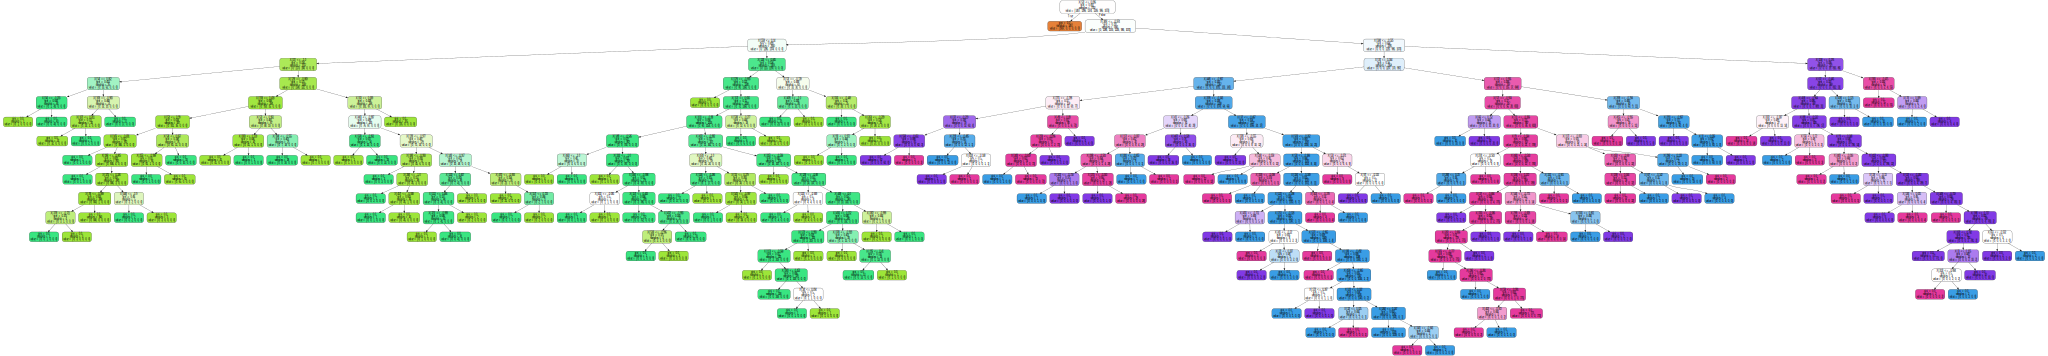

In [114]:
import graphviz

with open("human.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [100]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [126]:
grid_search.best_params_

# 최고점에서 뎁스 더 깊게 해주면서 더 내가 확장해서 세밀하게 튜닝해볼 수 있다

{'max_depth': 7}

In [ ]:
from sklearn.metrics import accuracy_score

pred = 

accuracy_score(y_test, pred)

In [123]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree_grid = DecisionTreeClassifier(random_state=42, max_depth=7).fit(X_train, y_train)


In [125]:
tree_grid.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00098259, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00689307, 0.        , 0.        ,
       0.        , 0.00414678, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00126255,
       0.00646193, 0.        , 0.26026599, 0.00213366, 0.00341522,
       0.        , 0.        , 0.01688174, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00236791, 0.00251283, 0.        , 0.        ,
       0.        , 0.00310705, 0.        , 0.        , 0.10431

In [118]:
def plot_feature_importances(model):
    n_features = 
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)
    
plot_feature_importances(tree)

TypeError: 'Index' object cannot be interpreted as an integer